In [1]:
from fastai.vision.all import *

path = untar_data(URLs.CAMVID)
path

Path('/Users/mohitsakhuja/.fastai/data/camvid')

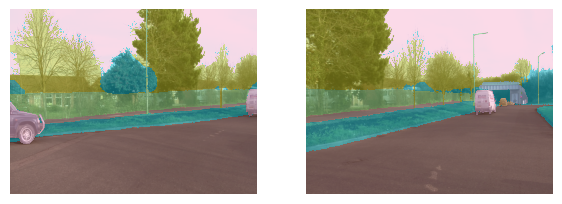

In [2]:
dls = SegmentationDataLoaders.from_label_func(
    path,
    bs=2,  # Reduced from 4 to 2 for better memory management
    valid_pct=0.2,
    seed=42,
    fnames=get_image_files(path / "images"),
    label_func=lambda image_path: path / "labels" / f"{image_path.stem}_P{image_path.suffix}",
    codes=np.loadtxt(path / "codes.txt", dtype=str),
)

dls.show_batch(max_n=4, figsize=(7, 8))

In [ ]:
# Check and set device type as per architecture
import torch

device_type = "cuda" if torch.cuda.is_available() else "mps" if torch.backends.mps.is_available() else "cpu"
device = torch.device(device_type)

device_type

In [ ]:
# Memory management utilities
import torch
import gc

def clear_memory():
    """Clear GPU memory cache"""
    if torch.cuda.is_available():
        torch.cuda.empty_cache()
    elif torch.backends.mps.is_available():
        torch.mps.empty_cache()
    gc.collect()

def get_memory_usage():
    """Get current memory usage"""
    if torch.cuda.is_available():
        allocated = torch.cuda.memory_allocated() / 1024**3  # GB
        reserved = torch.cuda.memory_reserved() / 1024**3  # GB
        print(f"CUDA allocated memory: {allocated:.2f} GB")
        print(f"CUDA reserved memory: {reserved:.2f} GB")
    elif torch.backends.mps.is_available():
        allocated = torch.mps.current_allocated_memory() / 1024**3  # GB
        print(f"MPS allocated memory: {allocated:.2f} GB")
    else:
        print("No GPU memory tracking available")

# Clear memory before training
get_memory_usage()
clear_memory()
get_memory_usage()

MPS allocated memory: 0.00 GB


In [ ]:
# Train a ResNet34 model with mixed precision.
clear_memory()
learner_34_fp16 = unet_learner(dls, resnet34).to_fp16() # Convert model to mixed precision
learner_34_fp16.model.to(device)  # Ensure model is on the correct device
learner_34_fp16.fit_one_cycle(8, 1e-3, wd=1e-2)
clear_memory()

/Users/mohitsakhuja/Documents/personal/deep-learning-for-coders/.venv/lib/python3.13/site-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()
/Users/mohitsakhuja/Documents/personal/deep-learning-for-coders/.venv/lib/python3.13/site-packages/torch/amp/autocast_mode.py:266: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn(
/Users/mohitsakhuja/Documents/personal/deep-learning-for-coders/.venv/lib/python3.13/site-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()
/Users/mohitsakhuja/Documents/personal/deep-learning-for-code

epoch,train_loss,valid_loss,time
0,0.796430,0.683132,08:28
1,0.655934,0.578910,08:21
2,0.526626,0.487114,08:21
3,0.471531,0.435860,10:22
4,0.364053,0.386253,08:23
5,0.319845,0.335158,08:29
6,0.262169,0.296007,08:36
7,0.244340,0.293542,08:29


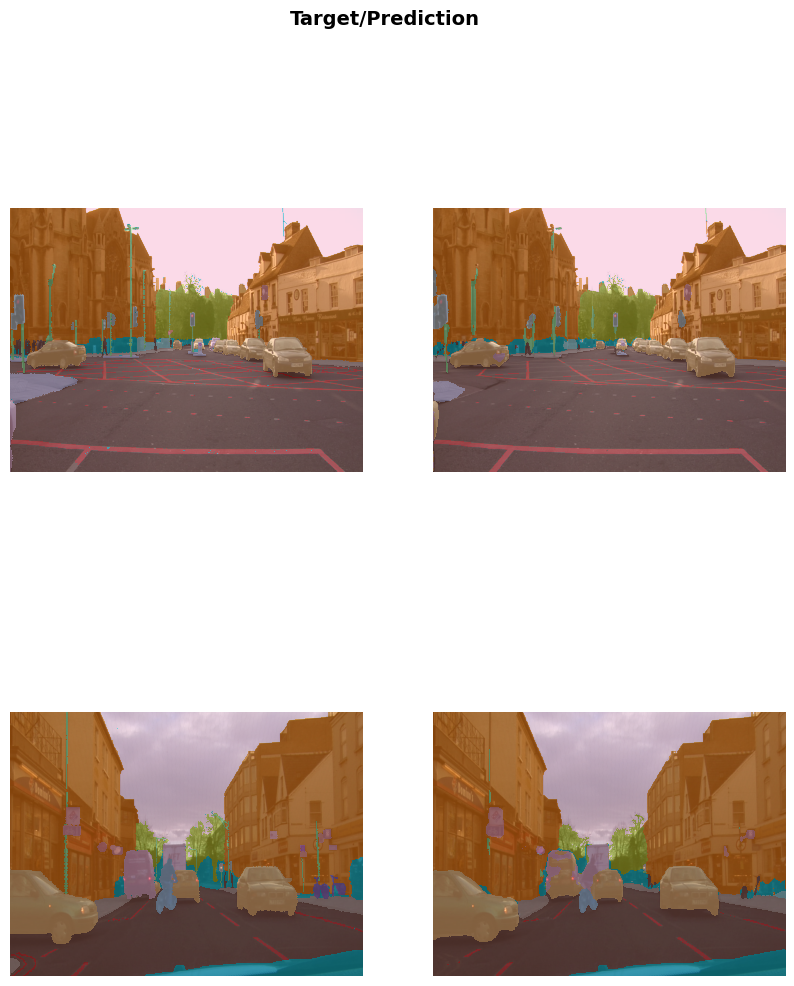

In [8]:
learner_34_fp16.show_results(max_n=6, figsize=(10, 12))